![](https://www.searchenginejournal.com/wp-content/uploads/2020/12/ecommerce-mcommerce-featured-image-5fd09a3a5ff2a.png)

<div>
<h2>Overview</h2>
<p><a href="https://www.kaggle.com/datasets/hellbuoy/online-retail-customer-clustering?datasetId=397875">Online retail Dataset</a> is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.</p>
<h2>Business Goal</h2>
<p>We aim to segement the Customers based on Recency, Frequncy, and Monetary Value so that the company can target its customers efficiently.</p>
<h3>The steps are broadly divided into:</h3>
<ol>
<li><a href="#1">Step 1: Reading and Understanding the Data</a></li>
<li><a href="#2">Step 2: Data Cleansing</a></li>
<li><a href="#3">Step 3: Feature Engineering &amp; Data Preparation</a></li>
<li><a href="#4">Step 4: Model Building</a></li>
<li><a href="#5">Step 5: Final Analysis</a></li>
</ol>
</div>

<a id="1"></a> <br>
## Step 1 : Reading and Understanding Data

In [287]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

<p>This code is importing several Python libraries that are commonly used for data analysis and visualization:</p>
<ul>
  <li><code>numpy</code> is a library for working with arrays and numerical operations.</li>
  <li><code>pandas</code> is a library for working with data frames and data manipulation.</li>
  <li><code>matplotlib</code> is a library for creating static, interactive, and animated visualizations in Python.</li>
  <li><code>seaborn</code> is a library for creating statistical graphics in Python.</li>
  <li><code>datetime</code> is a library for working with dates and times in Python.</li>
</ul>
<p>The code also imports several libraries that are commonly used for clustering:</p>
<ul>
  <li><code>sklearn</code> is a machine learning library for Python that includes many tools for clustering, classification, and regression.</li>
  <li><code>StandardScaler</code> is a class for scaling features by removing the mean and scaling to unit variance.</li>
  <li><code>KMeans</code> is a class for performing k-means clustering, which is a popular unsupervised machine learning algorithm for clustering data points.</li>
  <li><code>silhouette_score</code> is a function for calculating the silhouette score, which is a measure of how well-defined the clusters are.</li>
  <li><code>linkage</code> is a function for performing hierarchical clustering, which is another type of unsupervised machine learning algorithm for clustering data points.</li>
  <li><code>dendrogram</code> is a function for plotting a dendrogram, which is a tree-like diagram that shows the hierarchical clustering.</li>
  <li><code>cut_tree</code> is a function for cutting a dendrogram to form clusters.</li>
</ul>
<p>Overall, this code is setting up the necessary libraries for data analysis and clustering, which will be used in subsequent code for data exploration and modeling.</p>

In [288]:
e_commerce = pd.read_csv('/Users/devangshumitra/Desktop/UTD MSBA/4. Projects/Unsupervised (Clustering) Customer Segmentation/Online Retail K-Means & Hierarchical Clustering/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)
e_commerce.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


<p>This code reads the CSV file named "OnlineRetail.csv" into a pandas DataFrame named <code>e_commerce</code>, and displays the first few rows of the DataFrame using the <code>head()</code> method.</p>
<ul>
  <li>The <code>pd.read_csv()</code> function is used to read the CSV file. The file path is specified as the first argument, and the <code>sep</code>, <code>encoding</code>, and <code>header</code> parameters are used to specify the separator used in the CSV file (comma), the character encoding (ISO-8859-1), and whether the file has a header row (True).</li>
  <li>The <code>head()</code> method is then used to display the first few rows of the DataFrame. By default, <code>head()</code> displays the first 5 rows of the DataFrame, but this can be changed by passing a different number as an argument.</li>
</ul>

In [289]:
# Shape of the Dataframe
print('Dataframe Dimensions:', e_commerce.shape)

Dataframe Dimensions: (541909, 8)


<p>This code snippet prints the dimensions or shape of the e_commerce dataframe. The shape attribute of a pandas DataFrame returns a tuple of the number of rows and columns in the dataframe, respectively. The print() function is used to display the text "Dataframe Dimensions:" followed by the tuple of the number of rows and columns in the e_commerce dataframe.</p>
<p>By printing the dimensions of the dataframe, we can get a quick understanding of the size and structure of the dataset, which is useful while exploring and analyzing the data.</p>

In [290]:
#Name of all columns in the Dataframe
print('Columns Names:', e_commerce.columns)

Columns Names: Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


<p>This code uses the <code>print()</code> function to display the names of all columns in the <code>e_commerce</code> dataframe. The <code>columns</code> attribute of a pandas DataFrame returns an index object containing the names of all columns in the dataframe. The resulting output displays the text "Columns Names:" followed by the list of column names in the <code>e_commerce</code> dataframe.</p>

In [291]:
#Some basic information about the Features
e_commerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


<p>This code uses the <code>info()</code> method of a pandas DataFrame to display some basic information about the features or columns in the <code>e_commerce</code> dataframe, such as the column names, the number of non-null values in each column, and the data type of each column. The resulting output provides a concise summary of the dataframe's structure and data types.</p>

In [292]:
#Some basic description about the Features
e_commerce.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


<p>This code uses the <code>describe()</code> method of a pandas DataFrame to provide a summary of basic descriptive statistics for each numerical feature or column in the <code>e_commerce</code> dataframe, such as count, mean, standard deviation, minimum, and maximum values. The resulting output summarizes the distribution and range of values in each numerical feature of the dataframe.</p>

In [293]:
#Count of the number of Nulls in each feature
e_commerce.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<p>This code uses the <code>isnull()</code> method of a pandas DataFrame to check for missing or null values in each feature or column of the <code>e_commerce</code> dataframe. The resulting boolean DataFrame is then summed up using the <code>sum()</code> method to count the number of missing or null values in each column. The resulting output displays the count of missing or null values in each feature or column of the dataframe.</p>

In [294]:
#Counting the number of duplicate rows
e_commerce.duplicated().sum()

5268

<p>This code uses the <code>duplicated()</code> method of a pandas DataFrame to check for duplicate rows in the <code>e_commerce</code> dataframe. The resulting boolean Series indicates which rows are duplicates of previous rows. The <code>sum()</code> method is then used to count the number of <code>True</code> values in the boolean Series, which gives the count of duplicate rows in the dataframe. The resulting output displays the count of duplicate rows in the dataframe.</p>

<a id="2"></a> <br>
## Step 2 : Data Cleansing

In [295]:
# Calculating the feature wise percentage of Missing Values.
df_null = round(100*(e_commerce.isnull().sum())/len(e_commerce), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

<p>This code uses the <code>isnull()</code> method of a pandas DataFrame to check for missing or null values in each feature or column of the <code>e_commerce</code> dataframe. The resulting boolean DataFrame is summed up using the <code>sum()</code> method to count the number of missing or null values in each column. The resulting count of missing values in each column is then divided by the total number of rows in the dataframe and multiplied by 100 to get the percentage of missing values in each column. The resulting percentages are rounded to two decimal places using the <code>round()</code> function and stored in a new dataframe <code>df_null</code>. The resulting output displays the percentage of missing values in each feature or column of the dataframe.</p>

In [296]:
# Droping rows having missing values, and finding the new shape of the dataframe
e_commerce = e_commerce.dropna()
e_commerce.shape

(406829, 8)

<p>This code uses the <code>dropna()</code> method of a pandas DataFrame to remove all rows that contain missing or null values from the <code>e_commerce</code> dataframe. The resulting dataframe with no missing values is stored in the same variable <code>e_commerce</code>. The resulting shape of the dataframe is then printed to the console using the <code>shape</code> attribute of the dataframe, which displays the number of rows and columns in the resulting dataframe.</p>

In [297]:
# Changing the datatype of Customer Id to String data type as per Business requirements 
e_commerce['CustomerID'] = e_commerce['CustomerID'].astype(str)

<p>This code uses the <code>astype()</code> method of a pandas Series or DataFrame to change the datatype of the <code>CustomerID</code> column in the <code>e_commerce</code> dataframe from integer to string datatype. The resulting modified dataframe with the changed datatype for the <code>CustomerID</code> column is stored back in the same variable <code>e_commerce</code>. The resulting output does not display anything, but modifies the datatype of the <code>CustomerID</code> column in the dataframe.</p>

<a id="3"></a> <br>
## Step 3 : Feature Engineering & Data Preparation

#### We are going to analyse the Customers based on below 3 factors:
- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

In [298]:
# Creating a New Attribute : Amount for the Monetary factor
# Amount = Quantity * UnitPrice
e_commerce['Amount'] = e_commerce['Quantity']*e_commerce['UnitPrice']
rfm_amount = e_commerce.groupby('CustomerID')['Amount'].sum()
rfm_amount = rfm_amount.reset_index()
rfm_amount.head(10)

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
5,12352.0,1545.41
6,12353.0,89.00
7,12354.0,1079.40
8,12355.0,459.40
9,12356.0,2811.43


<p>This code creates a new attribute <code>Amount</code> in the <code>e_commerce</code> dataframe by multiplying the <code>Quantity</code> and <code>UnitPrice</code> columns. The resulting new <code>Amount</code> column is added to the <code>e_commerce</code> dataframe. The <code>groupby()</code> method of a pandas DataFrame is then used to group the <code>Amount</code> column values by each unique <code>CustomerID</code>. The <code>sum()</code> method is then used to compute the sum of <code>Amount</code> for each unique <code>CustomerID</code>. The resulting grouped data is stored in a new variable <code>rfm_amount</code>. The <code>reset_index()</code> method is then used to reset the index of the resulting grouped dataframe so that <code>CustomerID</code> becomes a column instead of an index. Finally, the first 10 rows of the resulting grouped and aggregated <code>rfm_amount</code> dataframe are printed to the console using the <code>head()</code> method.</p>

In [299]:
# Creating a New Attribute : Frequency
# Frequency is the count of number invoices raised to a particular CustomerID
rfm_frequency = e_commerce.groupby('CustomerID')['InvoiceNo'].count()
rfm_frequency = rfm_frequency.reset_index()
rfm_frequency.columns = ['CustomerID', 'Frequency']
rfm_frequency.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,95
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


<p>This code creates a new attribute <code>Frequency</code> in the <code>rfm_frequency</code> dataframe. The <code>groupby()</code> method of a pandas DataFrame is used to group the number of invoices raised to each unique <code>CustomerID</code> using the <code>InvoiceNo</code> column. The resulting number of invoices for each unique <code>CustomerID</code> is then counted using the <code>count()</code> method. The resulting grouped data is stored in the <code>rfm_frequency</code> variable. The <code>reset_index()</code> method is then used to reset the index of the resulting grouped dataframe so that <code>CustomerID</code> becomes a column instead of an index. The column names are then changed to <code>CustomerID</code> and <code>Frequency</code> using the <code>columns</code> attribute of the resulting <code>rfm_frequency</code> dataframe. Finally, the first 10 rows of the resulting <code>rfm_frequency</code> dataframe are printed to the console using the <code>head()</code> method.</p>

In [300]:
# Creating a New Attribute : Recency
# Recency is the difference in days between the last transaction date in the dataframe and the last 
# (cont.) transaction date of a specefic customer

In [301]:
# Formatting the InvoiceDate column to have datetime datatype
e_commerce['InvoiceDate'] = pd.to_datetime(e_commerce['InvoiceDate'],format='%d-%m-%Y %H:%M')

<p>This code is formatting the <code>InvoiceDate</code> column in the <code>e_commerce</code> dataframe to have datetime datatype. The <code>pd.to_datetime()</code> function from the pandas library is used to convert the <code>InvoiceDate</code> column values to datetime objects. The <code>format</code> parameter is used to specify the format of the input string. In this case, the format string is <code>'%d-%m-%Y %H:%M'</code>, which means that the input string is expected to be in the format <code>day-month-year hour:minute</code>. For example, the string <code>'12-01-2022 10:30'</code> would be converted to a datetime object representing January 12, 2022 at 10:30am. After the conversion, the <code>InvoiceDate</code> column values in the <code>e_commerce</code> dataframe will be represented as datetime objects instead of strings.</p>

In [302]:
# Computing the latest/last transaction date in the dataframe
last_date = max(e_commerce['InvoiceDate'])
print('The latest/last transaction date in the dataframe is:', last_date)

The latest/last transaction date in the dataframe is: 2011-12-09 12:50:00


<p>This code is computing the latest/last transaction date in the <code>e_commerce</code> dataframe by finding the maximum value in the <code>InvoiceDate</code> column. The <code>max()</code> function from the pandas library is used to find the maximum value in the <code>InvoiceDate</code> column, which corresponds to the latest/last transaction date in the dataframe. The <code>last_date</code> variable is assigned the value of the latest/last transaction date, and it is printed using the <code>print()</code> function.</p>

In [303]:
# Computing the difference between last date and transaction date for every transaction in the dataframe
# Storing the result in the new Date_Diff column
e_commerce['Date_Diff'] = last_date - e_commerce['InvoiceDate']

<p>This code is computing the difference between the latest/last transaction date in the <code>e_commerce</code> dataframe and the transaction date for every transaction in the dataframe. The <code>last_date</code> variable is the latest/last transaction date computed in the previous code. To compute the difference, the <code>e_commerce['InvoiceDate']</code> column is subtracted from the <code>last_date</code> value, resulting in a new column called <code>Date_Diff</code>. The <code>e_commerce['Date_Diff']</code> column contains the time interval between the latest/last transaction date and the transaction date for each row in the dataframe.</p>

In [304]:
e_commerce.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Date_Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373 days 04:24:00
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373 days 04:24:00
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 04:22:00
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373 days 04:22:00
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373 days 04:16:00


In [305]:
# Computing the most recent(last) transaction date for every customer to get the recency
rfm_recency = e_commerce.groupby('CustomerID')['Date_Diff'].min()
rfm_recency = rfm_recency.reset_index()

#Dropping the Hours and just keeping the number of days in the Date_Diff column
rfm_recency['Date_Diff'] = rfm_recency['Date_Diff'].dt.days

rfm_recency.head(10)

,CustomerID,Date_Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309
5,12352.0,35
6,12353.0,203
7,12354.0,231
8,12355.0,213
9,12356.0,22


<p>This code is computing the recency for each customer in the <code>e_commerce</code> dataframe. Recency is defined as the time interval between the latest/last transaction date and the most recent transaction date for each customer. To compute the recency, the <code>e_commerce</code> dataframe is first grouped by <code>CustomerID</code>. Then, for each group, the minimum value in the <code>Date_Diff</code> column is computed, which corresponds to the most recent transaction date for that customer. The resulting dataframe is stored in the <code>rfm_recency</code> variable. The <code>rfm_recency['Date_Diff']</code> column is converted to the number of days by accessing the <code>.dt.days</code> attribute of the datetime object. The resulting dataframe contains the <code>CustomerID</code> and the recency (in number of days) for each customer.</p>

In [306]:
# Merging Frequency, and Amount into the rfm dataframe using the CustomerID column
rfm = pd.merge(rfm_amount, rfm_frequency, on ='CustomerID', how ='inner')
rfm.head(10)

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17
5,12352.0,1545.41,95
6,12353.0,89.00,4
7,12354.0,1079.40,58
8,12355.0,459.40,13
9,12356.0,2811.43,59


<p>This code is merging the <code>rfm_amount</code> and <code>rfm_frequency</code> dataframes into a new dataframe called <code>rfm</code>. The merge is based on the <code>CustomerID</code> column, which is present in both dataframes. The <code>how='inner'</code> parameter in the <code>pd.merge</code> function ensures that only the customers who have both purchase frequency and purchase amount information are included in the resulting <code>rfm</code> dataframe. The resulting dataframe contains the <code>CustomerID</code>, the total purchase amount (<code>Amount</code>) and the purchase frequency (<code>Frequency</code>) for each customer.</p>

In [307]:
# Merging Recency to the rfm dataframe to get the final rfm dataframe using the CustomerID column
rfm = pd.merge(rfm, rfm_recency, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head(10)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
6,12353.0,89.00,4,203
7,12354.0,1079.40,58,231
8,12355.0,459.40,13,213
9,12356.0,2811.43,59,22


<p>This code is merging the <code>rfm_recency</code> and the previously created<code>rfm</code> dataframes. The merge is based on the <code>CustomerID</code> column, which is present in both dataframes. The <code>how='inner'</code> parameter in the <code>pd.merge</code> function ensures that only the customers who have both purchase recency and purchase amount and frequncy information are included in the resulting <code>rfm</code> dataframe. The resulting dataframe contains the <code>CustomerID</code>, the total purchase amount (<code>Amount</code>), the purchase frequency (<code>Frequency</code>), and the purchase recency (<code>Recency</code>)for each customer.</p>

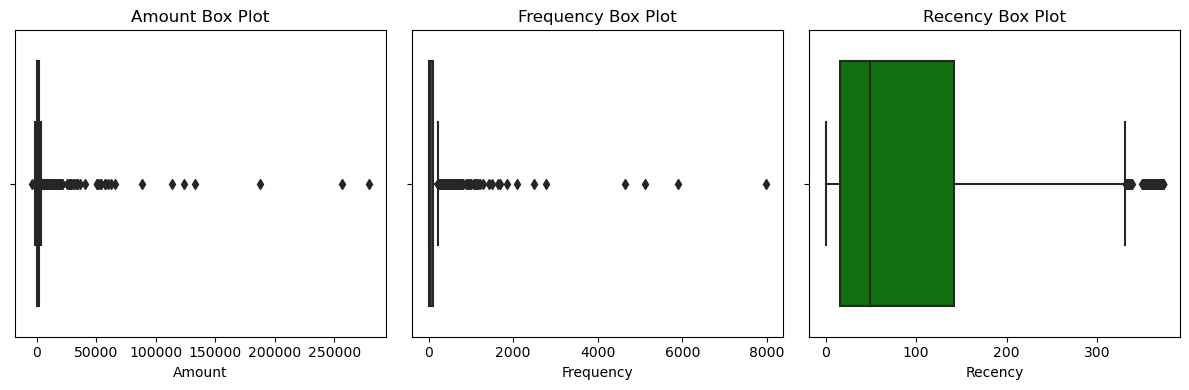

In [308]:
# Outlier Analysis of Amount Frequency and Recency
rfm_attributes = ['Amount', 'Frequency', 'Recency']

# Set the figure size
plt.figure(figsize=(12, 4))

# Create box plots for each variable
for i, attribute in enumerate(rfm_attributes):
    
    # Create box plot
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=rfm[attribute], color='green')
    plt.title(attribute + ' Box Plot')

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

<p>The code performs an outlier analysis for the three variables 'Amount', 'Frequency', and 'Recency' in the RFM (Recency, Frequency, Monetary) dataframe. It creates box plots for each variable using the seaborn library and shows them on a single plot.</p>
<ul>
<li>The code starts by defining a list of the three variables to be analyzed, i.e., 'Amount', 'Frequency', and 'Recency'. It then sets the figure size for the plot.</li>
<li>The code then loops through the attributes in the rfm_attributes list, creating a subplot for each variable. For each variable, it creates a box plot using the seaborn library, passing in the attribute values as the x-axis and setting the color to green. It also sets the title of each subplot to the attribute name followed by 'Box Plot'.</li>
<li>Finally, the code adjusts the spacing between subplots and shows the plot using the matplotlib library.</li>
</ul>

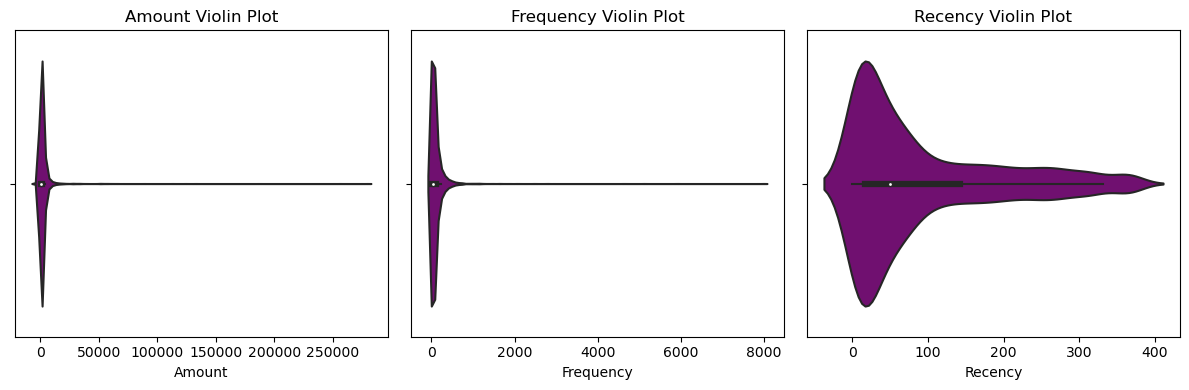

In [309]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Create violin plots for each variable
for i, attribute in enumerate(rfm_attributes):
    
    # Create violin plot
    plt.subplot(1, 3, i+1)
    sns.violinplot(x=rfm[attribute], color='purple')
    plt.title(attribute + ' Violin Plot')

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

<div>
<p>
This code creates a set of violin plots to visualize the distribution of three variables, which are stored in a DataFrame called 'rfm'. The three variables are specified in the list 'rfm_attributes'. 
</p>
<p>
The code sets the size of the figure to 12 inches by 4 inches using the 'plt.figure()' function. 
</p>
<p>
Then, a for loop is used to create a violin plot for each of the three variables. In each iteration of the loop, a new subplot is created using the 'plt.subplot()' function, and a violin plot is generated using the 'sns.violinplot()' function. The 'x' parameter of the violin plot is set to the values of the current variable in the 'rfm' DataFrame, and the color is set to purple using the 'color' parameter. The title of each subplot is set to the name of the current variable plus the string 'Violin Plot' using the 'plt.title()' function.
</p>
<p>
Finally, the spacing between the subplots is adjusted using the 'plt.tight_layout()' function, and the plot is displayed using the 'plt.show()' function.
</p>
</div>

/Users/devangshumitra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devangshumitra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/devangshumitra/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-leve

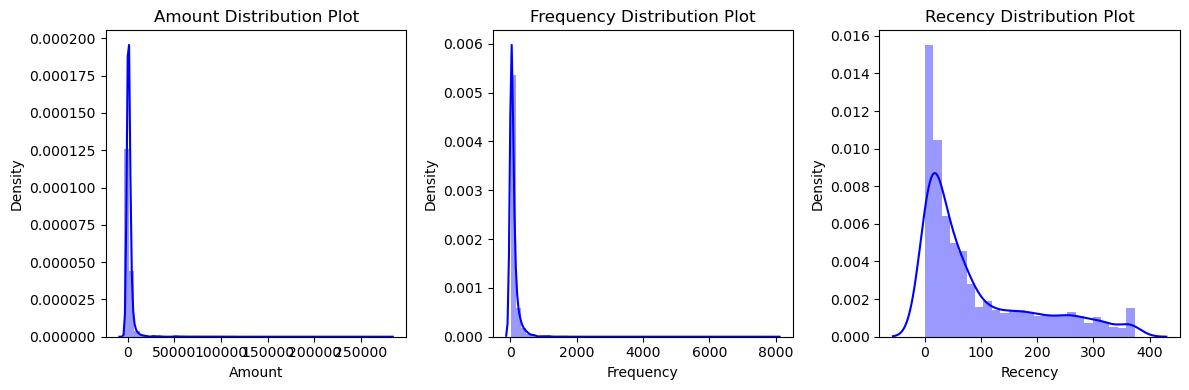

In [310]:
# Set the figure size
plt.figure(figsize=(12, 4))

# Create distribution plots for each variable
for i, attribute in enumerate(rfm_attributes):
    
    # Create distribution plot
    plt.subplot(1, 3, i+1)
    sns.distplot(rfm[attribute], color='blue')
    plt.title(attribute + ' Distribution Plot')

# Adjust spacing and show plot
plt.tight_layout()
plt.show()

<div>
<p>
This code creates a set of distribution plots to visualize the distribution of three variables, which are stored in a DataFrame called 'rfm'. The three variables are specified in the list 'rfm_attributes'. 
</p>
<p>
The code sets the size of the figure to 12 inches by 4 inches using the 'plt.figure()' function. 
</p>
<p>
Then, a for loop is used to create a distribution plot for each of the three variables. In each iteration of the loop, a new subplot is created using the 'plt.subplot()' function, and a distribution plot is generated using the 'sns.distplot()' function. The data for the current variable is passed to the 'sns.distplot()' function, and the color of the plot is set to blue using the 'color' parameter. The title of each subplot is set to the name of the current variable plus the string 'Distribution Plot' using the 'plt.title()' function.
</p>
<p>
Finally, the spacing between the subplots is adjusted using the 'plt.tight_layout()' function, and the plot is displayed using the 'plt.show()' function.
</p>
</div>

In [311]:
# Removing statistical outliers for Amount, Recency, Frequency
z_scores = pd.DataFrame()
for col in rfm_attributes:
    z_score = (rfm[col] - rfm[col].mean()) / rfm[col].std()
    z_scores[col] = z_score

# Remove values with a z-score greater than 3 or less than -3
rfm = rfm[(np.abs(z_scores) < 3).all(axis=1)]

<div>
<p>
This code removes statistical outliers from three variables ('Amount', 'Recency', 'Frequency') stored in a DataFrame called 'rfm'. 
</p>
<p>
First, a new DataFrame called 'z_scores' is created using the 'pd.DataFrame()' function. This DataFrame will contain the z-scores for each variable. 
</p>
<p>
Then, a for loop is used to calculate the z-scores for each variable. In each iteration of the loop, the z-score for the current variable is calculated using the formula (value - mean) / standard deviation. The resulting z-score is stored in the 'z_scores' DataFrame under the name of the current variable.
</p>
<p>
Finally, the code removes any rows from the 'rfm' DataFrame where any of the z-scores is greater than 3 or less than -3. This is achieved using the 'np.abs()' function to take the absolute value of the 'z_scores' DataFrame, the 'all()' method with axis=1 to check if all z-scores are within the threshold for each row, and the indexing operator [] to select only the rows that meet this condition. The resulting DataFrame is assigned back to 'rfm'.
</p>
</div>

In [312]:
rfm.head(10)

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
5,12352.0,1545.41,95,35
6,12353.0,89.00,4,203
7,12354.0,1079.40,58,231
8,12355.0,459.40,13,213
9,12356.0,2811.43,59,22


### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|Here, we will use Standardisation Scaling.(mean-0, sigma-1) 

In [313]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4321, 3)

<div>
<p>
This code rescales the values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm'. 
</p>
<p>
First, a new DataFrame called 'rfm_df' is created to contain only the three variables to be rescaled. This is done using the indexing operator [] to select only the relevant columns from the 'rfm' DataFrame. 
</p>
<p>
Then, a new instance of the 'StandardScaler' class is created using the 'StandardScaler()' function. This class is used to rescale the data such that each variable has a mean of 0 and a standard deviation of 1.
</p>
<p>
Finally, the 'fit_transform()' method of the 'StandardScaler' object is called on the 'rfm_df' DataFrame to rescale the data. The resulting rescaled data is stored in a new DataFrame called 'rfm_df_scaled', which has the same shape as 'rfm_df'.
</p>
</div>

In [314]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.634869,-0.741932,2.308286
1,1.367090,0.984789,-0.902112
2,0.199934,-0.463738,-0.178782
3,0.181498,-0.060836,-0.733666
4,-0.479543,-0.598039,2.149747


<div>
<p>
This code creates a new DataFrame called 'rfm_df_scaled' containing the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm'. 
</p>
<p>
First, the rescaled data is converted into a DataFrame using the 'pd.DataFrame()' function. The resulting DataFrame is assigned to 'rfm_df_scaled'.
</p>
<p>
Then, the column names of 'rfm_df_scaled' are updated to match the original column names of 'rfm' using the 'columns' attribute of the DataFrame object. This is done to make sure that the rescaled data is associated with the correct variables.
</p>
<p>
Finally, the first few rows of the 'rfm_df_scaled' DataFrame are displayed using the 'head()' method to verify that the rescaling was successful.
</p>
</div>

<a id="4"></a> <br>
## Step 4 : Building the Model

<div>
  <h2>K Means Clustering</h2>
  <p>K Means Clustering is an unsupervised machine learning algorithm used to group data points based on similarity. The algorithm attempts to partition a set of data points into K clusters, where each point belongs to the cluster with the nearest mean.</p>
  <h3>Algorithm Steps</h3>
  <ol>
    <li>Choose the number of clusters, K.</li>
    <li>Initialize K points called centroids randomly within the space of the data points.</li>
    <li>Assign each data point to the nearest centroid by calculating the Euclidean distance between each data point and each centroid.</li>
    <li>Recalculate the mean of each cluster to find the new centroids.</li>
    <li>Reassign each data point to the new nearest centroid based on the Euclidean distance between each data point and the new centroids.</li>
    <li>Repeat steps 4 and 5 until no data point changes the cluster.</li>
  </ol>
  <h3>Stepwise Explanation</h3>
  <ol>
    <li>Choose the number of clusters, K. This is the number of groups you want the data to be classified into.</li>
    <li>Initialize K points called centroids randomly within the space of the data points. These centroids represent the initial guess of the center points of each cluster.</li>
    <li>Assign each data point to the nearest centroid by calculating the Euclidean distance between each data point and each centroid. Euclidean distance is the straight line distance between two points.</li>
    <li>Recalculate the mean of each cluster to find the new centroids. This means that for each cluster, calculate the average of all the data points belonging to that cluster and set that as the new centroid of that cluster.</li>
    <li>Reassign each data point to the new nearest centroid based on the Euclidean distance between each data point and the new centroids. This means that for each data point, calculate the Euclidean distance between it and all the centroids and assign it to the nearest centroid.</li>
    <li>Repeat steps 4 and 5 until no data point changes the cluster. This means that when the clusters no longer change, the algorithm has converged and you have reached the optimal cluster solution.</li>
  </ol>
  <p>The final output of the algorithm is a set of K clusters with their respective centroids.</p>
</div>

In [315]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=5, max_iter=100)
kmeans.fit(rfm_df_scaled)
kmeans.labels_

array([2, 4, 1, ..., 1, 3, 1], dtype=int32)

<div>
<p>
This code applies the k-means algorithm to cluster the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm_df_scaled'. 
</p>
<p>
First, a new instance of the 'KMeans' class is created using the 'KMeans()' function. The 'n_clusters' parameter is set to 5 to specify the number of clusters to be created, and the 'max_iter' parameter is set to 100 to limit the maximum number of iterations for each run of the algorithm.
</p>
<p>
Then, the 'fit()' method of the 'KMeans' object is called on the 'rfm_df_scaled' DataFrame to fit the k-means model to the data. This involves initializing the centroids randomly and iteratively refining them until convergence.
</p>
<p>
Finally, the 'labels_' attribute of the 'KMeans' object is accessed to obtain the cluster assignments for each data point in the 'rfm_df_scaled' DataFrame. The resulting labels are an array with the same length as the number of rows in 'rfm_df_scaled', and each value corresponds to the cluster assignment for the corresponding row.
</p>
</div>

<div>
  <h2>Finding the Optimal Number of Clusters in K Means using Elbow Curve</h2>
  <p>When performing K Means Clustering, the optimal number of clusters is not always known beforehand. One way to determine the optimal number of clusters is by using the elbow method. The elbow method involves plotting the relationship between the number of clusters and the within-cluster sum of squares (WSS) and identifying the elbow point of the resulting curve.</p>
  <h3>Algorithm Steps</h3>
  <ol>
    <li>Initialize K means algorithm with a range of possible values of K.</li>
    <li>For each K, perform K means clustering and compute the WSS.</li>
    <li>Plot the relationship between K and WSS.</li>
    <li>Identify the elbow point in the curve. This is the point of inflection where the WSS begins to level off.</li>
    <li>The optimal number of clusters is the value of K at the elbow point.</li>
  </ol>
  <h3>Stepwise Explanation</h3>
  <ol>
    <li>Initialize K means algorithm with a range of possible values of K. This involves deciding on a range of values for K to try.</li>
    <li>For each K, perform K means clustering and compute the WSS. WSS is the sum of the squared distances between each data point and its assigned centroid. This step involves running K Means Clustering for each value of K and computing the WSS for that solution.</li>
    <li>Plot the relationship between K and WSS. This involves plotting the value of K against the corresponding WSS for each value of K.</li>
    <li>Identify the elbow point in the curve. This is the point of inflection where the WSS begins to level off. This point is called the elbow because the curve typically looks like an arm with a bend at the elbow.</li>
    <li>The optimal number of clusters is the value of K at the elbow point. This value of K represents the best trade-off between having enough clusters to capture the underlying structure in the data and not having too many clusters, which can result in overfitting and decreased interpretability.</li>
  </ol>
  <p>The elbow method provides a simple and visual way to determine the optimal number of clusters in K Means Clustering.</p>
</div>

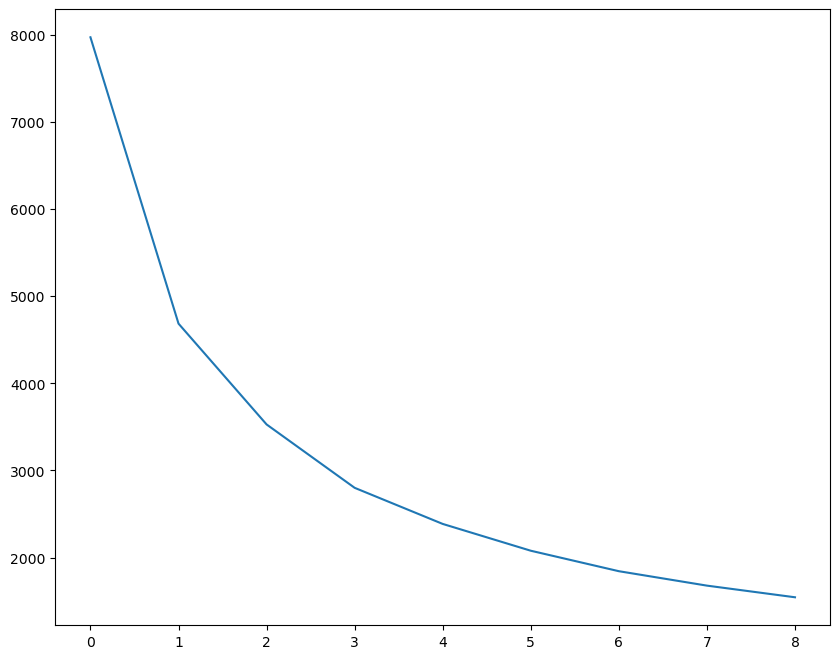

In [316]:
# Elbow-curve / Sum of Squared Distances (SSD)

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter = 100)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

<div>
<p>
This code uses the elbow method to determine the optimal number of clusters for the k-means algorithm applied to the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm_df_scaled'. 
</p>
<p>
First, an empty list called 'ssd' is created to store the sum of squared distances (SSD) for each number of clusters. Then, a list of candidate numbers of clusters called 'range_n_clusters' is created.
</p>
<p>
A for loop is used to fit k-means models with different numbers of clusters and compute their SSD. In each iteration of the loop, a new instance of the 'KMeans' class is created with the current number of clusters, and the 'fit()' method is called on the 'rfm_df_scaled' DataFrame to fit the model to the data. The SSD is obtained using the 'inertia_' attribute of the 'KMeans' object, which returns the sum of squared distances of samples to their closest cluster center. The resulting SSD is appended to the 'ssd' list.
</p>
<p>
Finally, a line plot of the SSD values is created using the 'plt.plot()' function to visualize the relationship between the number of clusters and the corresponding SSD. The elbow point, where the rate of decrease in SSD slows down, can be used to determine the optimal number of clusters.
</p>
</div>

<div>
  <h2>Finding the Optimal Number of Clusters in K Means using Silhouette Analysis</h2>
  <p>Another way to determine the optimal number of clusters in K Means Clustering is by using silhouette analysis. Silhouette analysis computes a score for each data point that measures how similar that point is to its assigned cluster compared to other clusters. The average silhouette score across all data points can be used to assess the overall quality of a clustering solution.</p>
  <h3>Algorithm Steps</h3>
  <ol>
    <li>Initialize K means algorithm with a range of possible values of K.</li>
    <li>For each K, perform K means clustering and compute the average silhouette score.</li>
    <li>Plot the relationship between K and the average silhouette score.</li>
    <li>The optimal number of clusters is the value of K that maximizes the average silhouette score.</li>
  </ol>
  <h3>Stepwise Explanation</h3>
  <ol>
    <li>Initialize K means algorithm with a range of possible values of K. This involves deciding on a range of values for K to try.</li>
    <li>For each K, perform K means clustering and compute the average silhouette score. This step involves running K Means Clustering for each value of K, computing the average silhouette score for that solution, and storing it.</li>
    <li>Plot the relationship between K and the average silhouette score. This involves plotting the value of K against the corresponding average silhouette score for each value of K.</li>
    <li>The optimal number of clusters is the value of K that maximizes the average silhouette score. This value of K represents the clustering solution with the best balance between intra-cluster similarity and inter-cluster dissimilarity.</li>
  </ol>
  <p>Silhouette analysis provides a more quantitative way to determine the optimal number of clusters in K Means Clustering, in contrast to the elbow method which is more qualitative.</p>

  <h2>Silhouette Score Formula</h2>
  <p>The silhouette score measures how similar a data point is to the other data points in its assigned cluster compared to data points assigned to other clusters. The score is calculated as follows:</p>
  <p style="text-align:center; font-size: 1.5em;"><em>silhouette score = (p - q) / max(p, q)</em></p>
  <p>where:</p>
  <ul>
    <li><strong>p</strong> is the mean distance to the points in the nearest cluster that the data point is not a part of</li>
    <li><strong>q</strong> is the mean intra-cluster distance to all the points in its own cluster</li>
  </ul>
  <p>The silhouette score ranges from -1 to 1:</p>
  <ul>
    <li>A score closer to 1 indicates that the data point is very similar to other data points in the cluster.</li>
    <li>A score closer to -1 indicates that the data point is not similar to the data points in its cluster.</li>
    <li>A score close to 0 indicates that the data point is on the border between two clusters and could potentially be assigned to either one.</li>
  </ul>
</div>

In [317]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5597142282415379
For n_clusters=3, the silhouette score is 0.5176887204370012
For n_clusters=4, the silhouette score is 0.5172384638116904
For n_clusters=5, the silhouette score is 0.47144686252480306
For n_clusters=6, the silhouette score is 0.4281296920908587
For n_clusters=7, the silhouette score is 0.42291512890123883
For n_clusters=8, the silhouette score is 0.4120028549516046
For n_clusters=9, the silhouette score is 0.41045286335809655
For n_clusters=10, the silhouette score is 0.4150432109853454


<div>
<p>
This code performs a silhouette analysis to evaluate the quality of the clusters obtained with the k-means algorithm applied to the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm_df_scaled'. 
</p>
<p>
First, a list of candidate numbers of clusters called 'range_n_clusters' is created.
</p>
<p>
A for loop is used to fit k-means models with different numbers of clusters and compute their silhouette score. In each iteration of the loop, a new instance of the 'KMeans' class is created with the current number of clusters, and the 'fit()' method is called on the 'rfm_df_scaled' DataFrame to fit the model to the data. The cluster labels are obtained using the 'labels_' attribute of the 'KMeans' object, which returns the cluster index for each sample. 
</p>
<p>
The silhouette score is computed using the 'silhouette_score()' function from the 'sklearn.metrics' module, which measures the similarity of each sample to its own cluster compared to other clusters. The resulting silhouette score is printed to the console for each number of clusters.
</p>
</div>

In [318]:
# Final K means model with k=2
kmeans2 = KMeans(n_clusters=2, max_iter=100)
kmeans2.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=2)

<div>
<p>
This code applies the k-means algorithm with k=2 to cluster the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm_df_scaled'. 
</p>
<p>
First, a new instance of the 'KMeans' class is created using the 'KMeans()' function. The 'n_clusters' parameter is set to 2 to specify the number of clusters to be created, and the 'max_iter' parameter is set to 100 to limit the maximum number of iterations for each run of the algorithm.
</p>
<p>
Then, the 'fit()' method of the 'KMeans' object is called on the 'rfm_df_scaled' DataFrame to fit the k-means model to the data. This involves initializing the centroids randomly and iteratively refining them until convergence.
</p>
</div>

In [319]:
# Final K means model with k=3
kmeans3 = KMeans(n_clusters=3, max_iter=100)
kmeans3.fit(rfm_df_scaled)

KMeans(max_iter=100, n_clusters=3)

<div>
<p>
This code applies the k-means algorithm with k=3 to cluster the rescaled values of three variables ('Amount', 'Frequency', 'Recency') stored in a DataFrame called 'rfm_df_scaled'. 
</p>
<p>
First, a new instance of the 'KMeans' class is created using the 'KMeans()' function. The 'n_clusters' parameter is set to 3 to specify the number of clusters to be created, and the 'max_iter' parameter is set to 100 to limit the maximum number of iterations for each run of the algorithm.
</p>
<p>
Then, the 'fit()' method of the 'KMeans' object is called on the 'rfm_df_scaled' DataFrame to fit the k-means model to the data. This involves initializing the centroids randomly and iteratively refining them until convergence.
</p>
</div>

In [320]:
 kmeans2.labels_

array([0, 1, 0, ..., 0, 1, 0], dtype=int32)

<div>
<p>
This code obtains the cluster assignments for each data point in the 'rfm_df_scaled' DataFrame using the k-means model with k=2.
</p>
<p>
The 'labels_' attribute of the 'KMeans' object is accessed to obtain the cluster assignments for each data point in the 'rfm_df_scaled' DataFrame. The resulting labels are an array with the same length as the number of rows in 'rfm_df_scaled', and each value corresponds to the cluster assignment for the corresponding row.
</p>
</div>

In [321]:
 kmeans3.labels_

array([0, 1, 2, ..., 2, 1, 2], dtype=int32)

<div>
<p>
This code obtains the cluster assignments for each data point in the 'rfm_df_scaled' DataFrame using the k-means model with k=3.
</p>
<p>
The 'labels_' attribute of the 'KMeans' object is accessed to obtain the cluster assignments for each data point in the 'rfm_df_scaled' DataFrame. The resulting labels are an array with the same length as the number of rows in 'rfm_df_scaled', and each value corresponds to the cluster assignment for the corresponding row.
</p>
</div>

In [322]:
# assign the label
rfm['2_Cluster_Id'] = kmeans2.labels_
rfm['3_Cluster_Id'] = kmeans3.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,2_Cluster_Id,3_Cluster_Id
0,12346.0,0.00,2,325,0,0
1,12347.0,4310.00,182,1,1,1
2,12348.0,1797.24,31,74,0,2
3,12349.0,1757.55,73,18,0,2
4,12350.0,334.40,17,309,0,0


<div>
<p>
This code adds two new columns to the 'rfm' DataFrame called '2_Cluster_Id' and '3_Cluster_Id' that contain the cluster assignments for each data point using the k-means models with k=2 and k=3, respectively. 
</p>
<p>
The 'labels_' attribute of the 'KMeans' objects is assigned to these new columns to store the cluster assignments. The resulting DataFrame is then printed to the console using the 'head()' method to show the first few rows.
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Id', ylabel='Amount'>

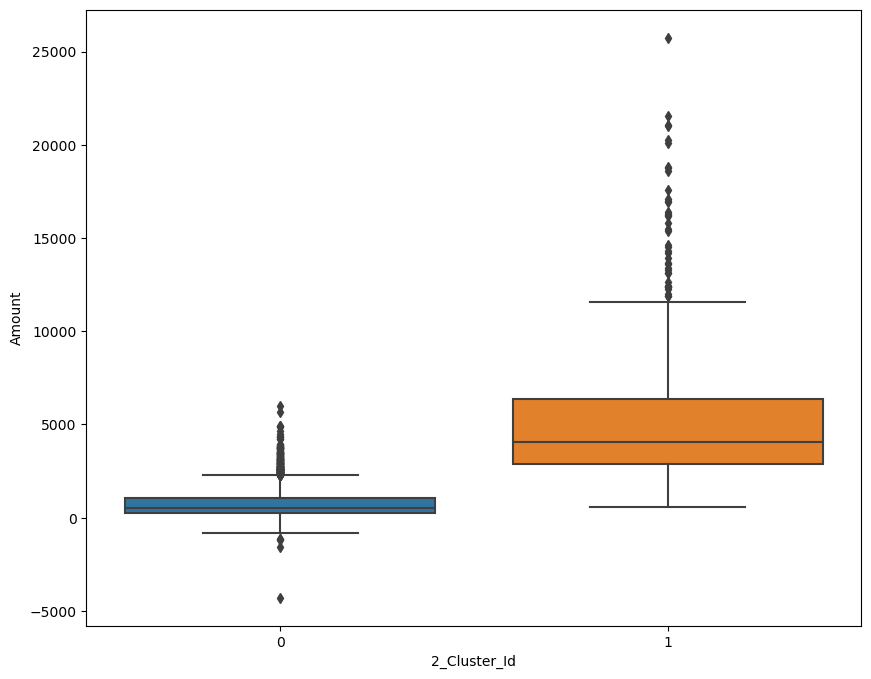

In [323]:
# Box plot to visualize Cluster Id 2 vs Amount
sns.boxplot(x='2_Cluster_Id', y='Amount', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Amount' variable for each cluster obtained with the k-means model with k=2. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '2_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Amount' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Id', ylabel='Frequency'>

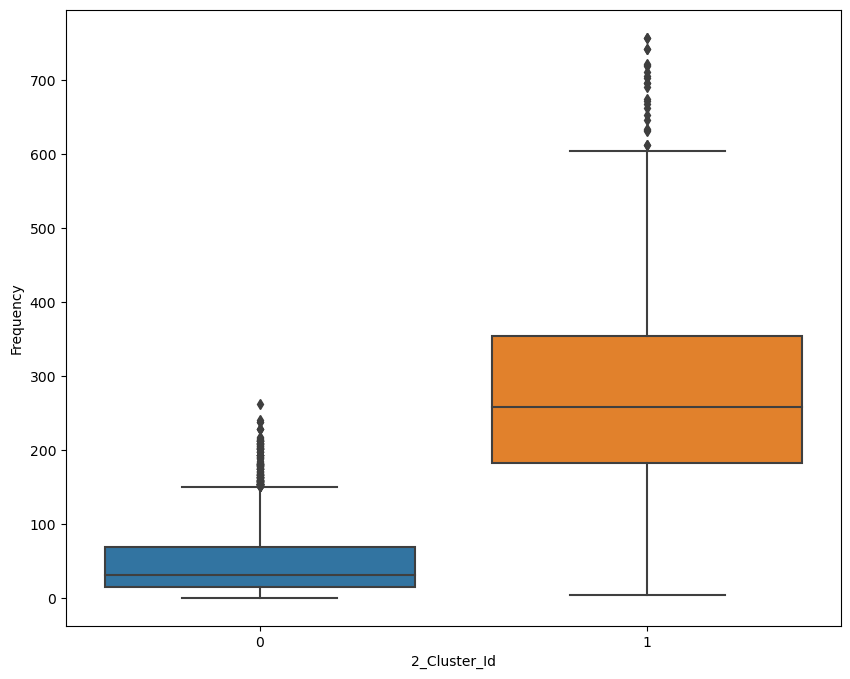

In [324]:
# Box plot to visualize Cluster Id 2 vs Frequency
sns.boxplot(x='2_Cluster_Id', y='Frequency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Frequency' variable for each cluster obtained with the k-means model with k=2. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '2_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Frequency' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Id', ylabel='Recency'>

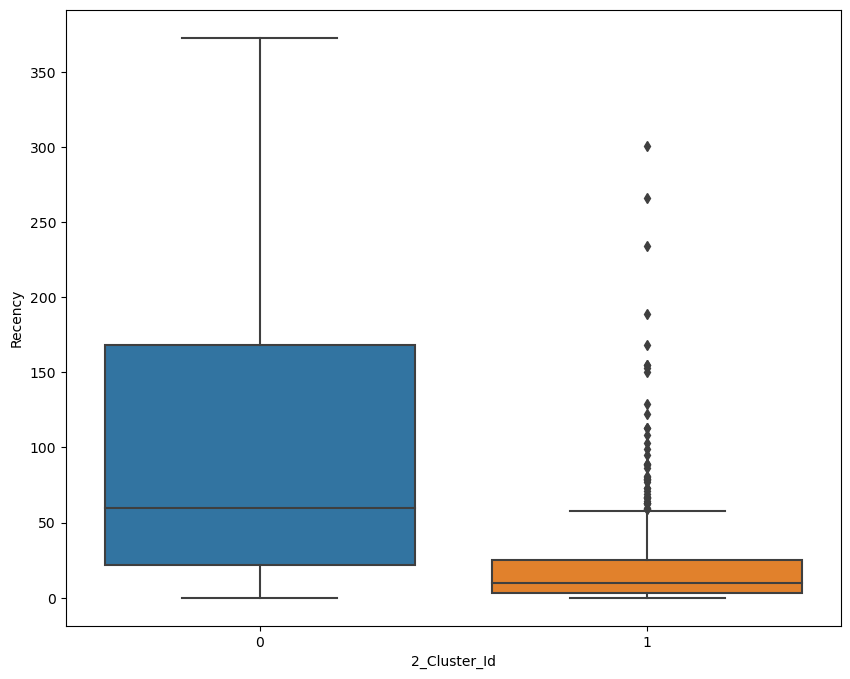

In [325]:
# Box plot to visualize Cluster Id 2 vs Recency
sns.boxplot(x='2_Cluster_Id', y='Recency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Recency' variable for each cluster obtained with the k-means model with k=2. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '2_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Recency' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Id', ylabel='Amount'>

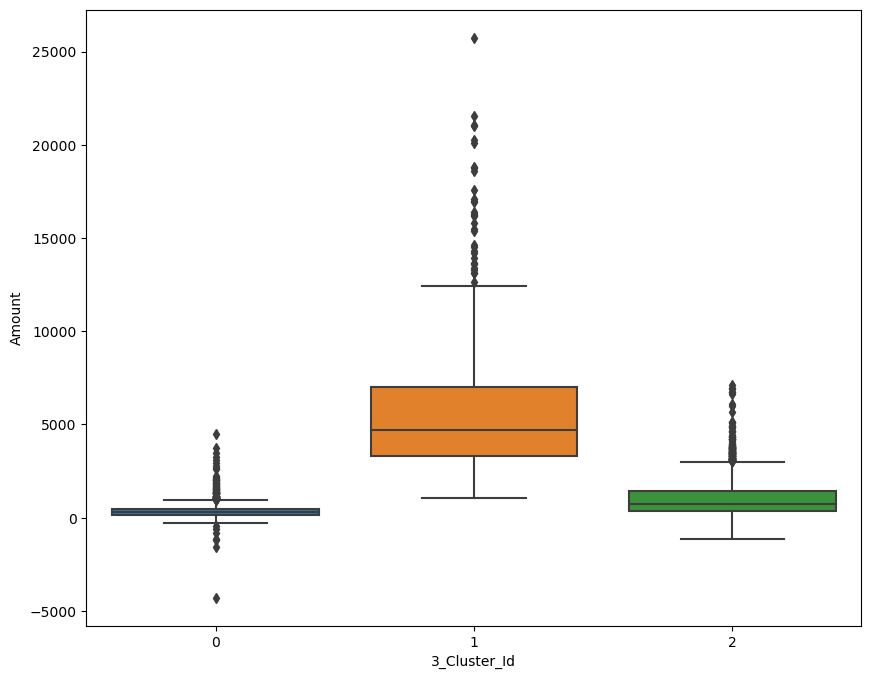

In [326]:
# Box plot to visualize Cluster Id 3 vs Amount
sns.boxplot(x='3_Cluster_Id', y='Amount', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Amount' variable for each cluster obtained with the k-means model with k=3. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '3_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Amount' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Id', ylabel='Frequency'>

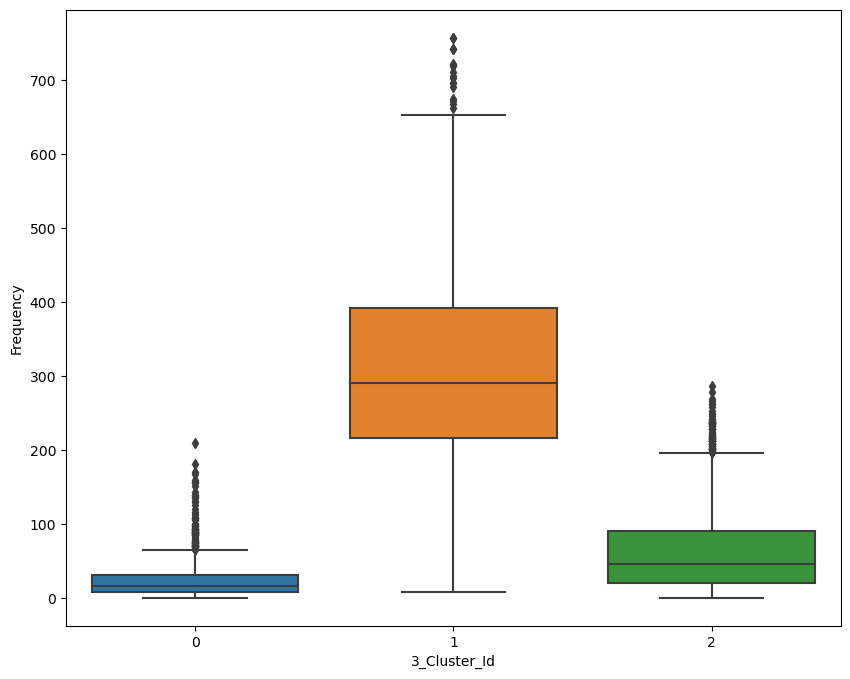

In [327]:
# Box plot to visualize Cluster Id 3 vs Frequency
sns.boxplot(x='3_Cluster_Id', y='Frequency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Frequency' variable for each cluster obtained with the k-means model with k=3. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '3_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Frequency' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Id', ylabel='Recency'>

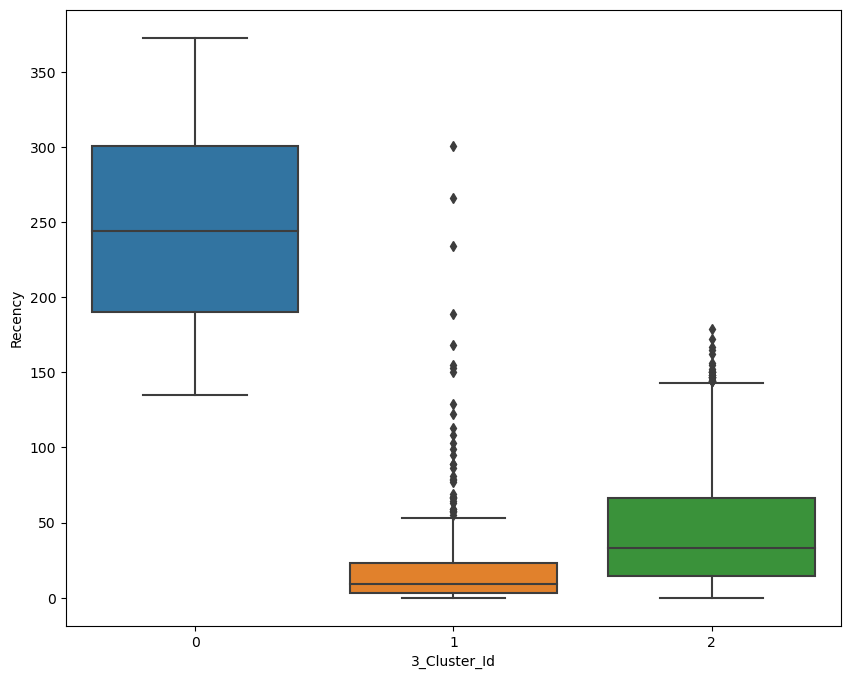

In [328]:
# Box plot to visualize Cluster Id 3 vs Recency
sns.boxplot(x='3_Cluster_Id', y='Recency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the distribution of the 'Recency' variable for each cluster obtained with the k-means model with k=3. 
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the plot. The 'x' parameter is set to '3_Cluster_Id' to group the data by the cluster assignments, and the 'y' parameter is set to 'Recency' to display the distribution of this variable for each cluster. The 'data' parameter is set to 'rfm' to indicate that the data is stored in this DataFrame. 
</p>
</div>

<div>
  <h2>Hierarchical Clustering</h2>
  <p>Hierarchical clustering is an unsupervised learning algorithm that groups similar objects into clusters based on their distance or similarity. The algorithm builds a hierarchy of clusters by recursively dividing or merging clusters until a stopping criterion is met.</p>
  <h3>Types of Hierarchical Clustering</h3>
  <ul>
    <li><strong>Agglomerative Hierarchical Clustering</strong>: In this method, each data point is initially considered as a separate cluster and then iteratively merged into larger clusters based on their similarity. This process continues until all the data points are merged into a single cluster. This is a bottom-up approach.</li>
    <li><strong>Divisive Hierarchical Clustering</strong>: In this method, all the data points are initially considered as a single cluster and then iteratively divided into smaller clusters based on their dissimilarity. This process continues until each data point is in its own cluster. This is a top-down approach.</li>
  </ul>
  <h3>Steps in Agglomerative Hierarchical Clustering</h3>
  <ol>
    <li><strong>Step 1:</strong> Assign each data point to its own cluster.</li>
    <li><strong>Step 2:</strong> Compute the pairwise distance/similarity matrix between all the data points.</li>
    <li><strong>Step 3:</strong> Merge the two closest clusters based on the distance/similarity matrix.</li>
    <li><strong>Step 4:</strong> Recompute the pairwise distance/similarity matrix between the new clusters and the remaining data points.</li>
    <li><strong>Step 5:</strong> Repeat steps 3-4 until all the data points belong to a single cluster or the desired number of clusters is reached.</li>
  </ol>
  <h3>Visualization with Dendrogram</h3>
  <p>A dendrogram is a tree-like diagram that represents the hierarchical clustering process. It shows the order in which the clusters were merged and the distances between them. The height of each branch on the dendrogram represents the distance between the two clusters being merged.</p>
</div>

<div>
  <h2>Single Linkage Hierarchical Clustering</h2>
  <p>Single linkage hierarchical clustering is a bottom-up agglomerative clustering method that starts with each data point as a separate cluster and then iteratively merges the two closest clusters based on the minimum distance between their members.</p>
  <h3>Steps in Single Linkage Hierarchical Clustering</h3>
  <ol>
    <li><strong>Step 1:</strong> Assign each data point to its own cluster.</li>
    <li><strong>Step 2:</strong> Compute the pairwise distance/similarity matrix between all the data points.</li>
    <li><strong>Step 3:</strong> Merge the two closest clusters based on the minimum distance between their members. In single linkage, the distance between two clusters is defined as the minimum distance between any pair of points, one from each cluster.</li>
    <li><strong>Step 4:</strong> Recompute the pairwise distance/similarity matrix between the new clusters and the remaining data points.</li>
    <li><strong>Step 5:</strong> Repeat steps 3-4 until all the data points belong to a single cluster or the desired number of clusters is reached.</li>
  </ol>
</div>

![](https://www.saedsayad.com/images/Clustering_single.png)

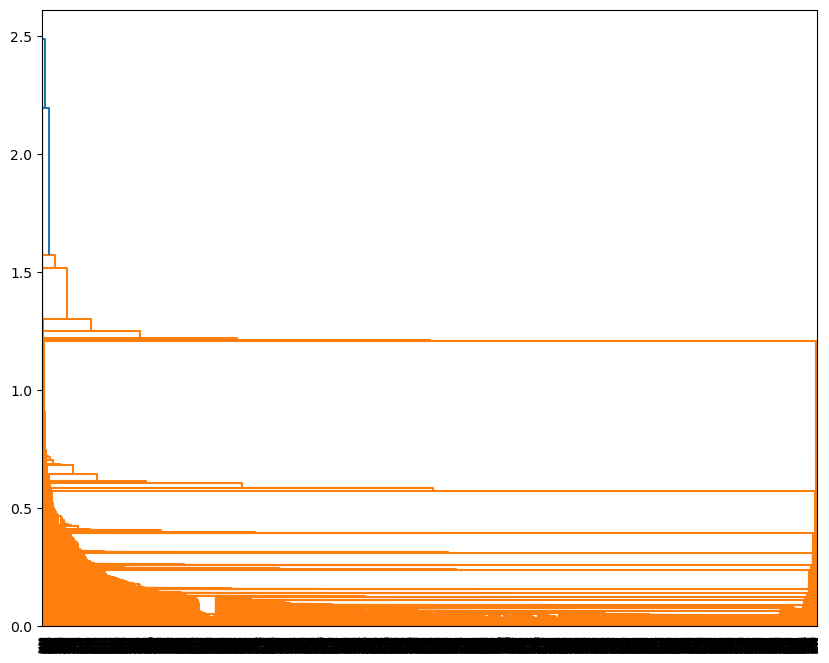

In [329]:
# Single linkage: 
heirarchy = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(heirarchy)
plt.show()

<div>
<p>
This code performs hierarchical clustering on the 'rfm_df_scaled' DataFrame using the single linkage method with the Euclidean distance metric and visualizes the resulting dendrogram. 
</p>
<p>
The 'linkage()' function from the SciPy library is used to perform hierarchical clustering with the specified method and distance metric. The resulting linkage matrix is stored in the 'hierarchy' variable. 
</p>
<p>
The 'dendrogram()' function from the SciPy library is then used to create the dendrogram from the linkage matrix. The resulting plot is displayed using the 'plt.show()' function from the Matplotlib library.
</p>
</div>

<div>
  <h2>Average Linkage Hierarchical Clustering</h2>
  <p>Average linkage hierarchical clustering is a bottom-up agglomerative clustering method that starts with each data point as a separate cluster and then iteratively merges the two closest clusters based on the average distance between their members.</p>
  <h3>Steps in Average Linkage Hierarchical Clustering</h3>
  <ol>
    <li><strong>Step 1:</strong> Assign each data point to its own cluster.</li>
    <li><strong>Step 2:</strong> Compute the pairwise distance/similarity matrix between all the data points.</li>
    <li><strong>Step 3:</strong> Compute the average distance between all pairs of points, one from each cluster, to obtain the pairwise distance matrix between the clusters.</li>
    <li><strong>Step 4:</strong> Merge the two closest clusters based on the average distance between their members.</li>
    <li><strong>Step 5:</strong> Recompute the pairwise distance/similarity matrix between the new clusters and the remaining data points.</li>
    <li><strong>Step 6:</strong> Repeat steps 3-5 until all the data points belong to a single cluster or the desired number of clusters is reached.</li>
  </ol>
</div>

![](https://www.saedsayad.com/images/Clustering_average.png)

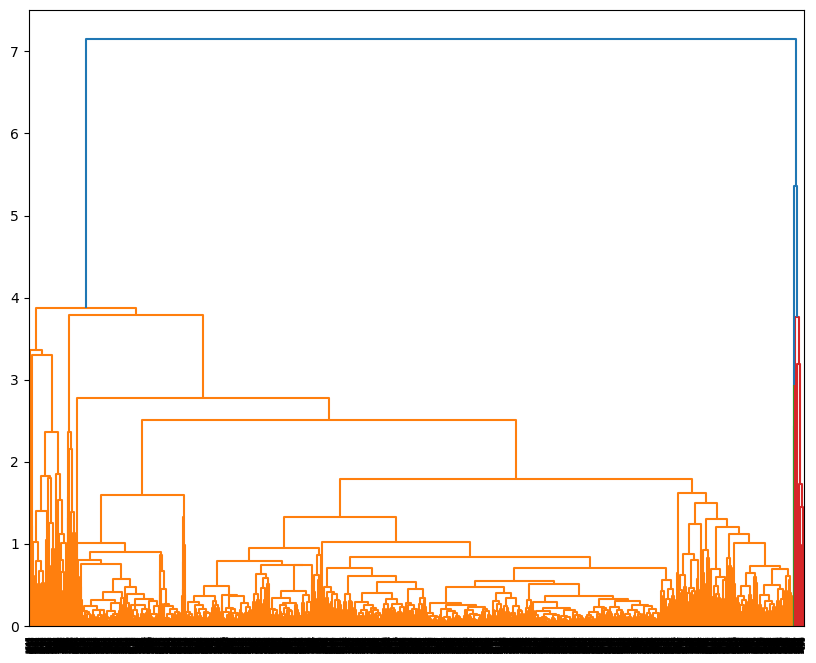

In [330]:
# Average linkage
heirarchy = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(heirarchy)
plt.show()

<div>
<p>
This code performs hierarchical clustering on the 'rfm_df_scaled' DataFrame using the average linkage method with the Euclidean distance metric and visualizes the resulting dendrogram. 
</p>
<p>
The 'linkage()' function from the SciPy library is used to perform hierarchical clustering with the specified method and distance metric. The resulting linkage matrix is stored in the 'hierarchy' variable. 
</p>
<p>
The 'dendrogram()' function from the SciPy library is then used to create the dendrogram from the linkage matrix. The resulting plot is displayed using the 'plt.show()' function from the Matplotlib library.
</p>
</div>

<div>
  <h2>Complete Linkage Hierarchical Clustering</h2>
  <p>Complete linkage hierarchical clustering is a bottom-up agglomerative clustering method that starts with each data point as a separate cluster and then iteratively merges the two closest clusters based on the maximum distance between their members.</p>
  <h3>Steps in Complete Linkage Hierarchical Clustering</h3>
  <ol>
    <li><strong>Step 1:</strong> Assign each data point to its own cluster.</li>
    <li><strong>Step 2:</strong> Compute the pairwise distance/similarity matrix between all the data points.</li>
    <li><strong>Step 3:</strong> Compute the maximum distance between all pairs of points, one from each cluster, to obtain the pairwise distance matrix between the clusters.</li>
    <li><strong>Step 4:</strong> Merge the two closest clusters based on the maximum distance between their members.</li>
    <li><strong>Step 5:</strong> Recompute the pairwise distance/similarity matrix between the new clusters and the remaining data points.</li>
    <li><strong>Step 6:</strong> Repeat steps 3-5 until all the data points belong to a single cluster or the desired number of clusters is reached.</li>
  </ol>
  <h3>Visualization with Dendrogram</h3>
  <p>A dendrogram is a tree-like diagram that represents the hierarchical clustering process. In complete linkage, the height of each branch on the dendrogram represents the maximum distance between the members of the two clusters being merged.</p>
</div>

![](https://www.saedsayad.com/images/Clustering_complete.png)

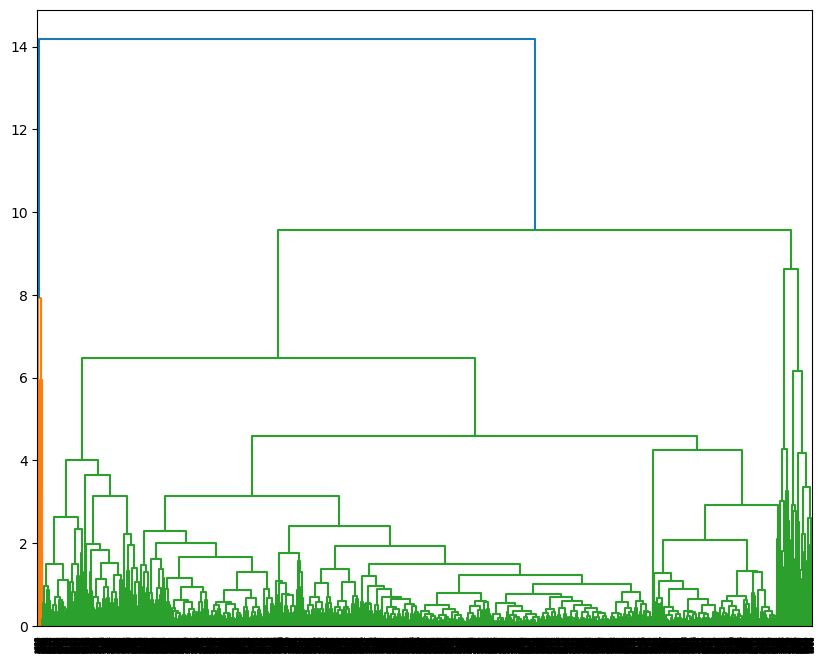

In [331]:
# Complete linkage
heirarchy = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(heirarchy)
plt.show()

<div>
<p>
This code performs hierarchical clustering on the 'rfm_df_scaled' DataFrame using the complete linkage method with the Euclidean distance metric and visualizes the resulting dendrogram. 
</p>
<p>
The 'linkage()' function from the SciPy library is used to perform hierarchical clustering with the specified method and distance metric. The resulting linkage matrix is stored in the 'hierarchy' variable. 
</p>
<p>
The 'dendrogram()' function from the SciPy library is then used to create the dendrogram from the linkage matrix. The resulting plot is displayed using the 'plt.show()' function from the Matplotlib library.
</p>
</div>

#### Cutting the Dendrogram based on K

In [332]:
# 2 clusters
cluster_labels_2 = cut_tree(heirarchy, n_clusters=2).reshape(-1, )

# 3 clusters
cluster_labels_3 = cut_tree(heirarchy, n_clusters=3).reshape(-1, )

<div>
<p>
This code performs hierarchical clustering on the 'rfm_df_scaled' DataFrame using the complete linkage method with the Euclidean distance metric and assigns cluster labels to each observation for 2 and 3 clusters. 
</p>
<p>
The 'cut_tree()' function from the SciPy library is used to assign cluster labels to each observation based on the hierarchical clustering. The resulting cluster labels are stored in the 'cluster_labels_2' and 'cluster_labels_3' variables for 2 and 3 clusters respectively. The 'reshape()' function is used to ensure that the shape of the resulting array is (-1, ) to match the shape of the original DataFrame.
</p>
</div>

In [333]:
# Assign cluster labels
rfm['2_Cluster_Labels'] = cluster_labels_2
rfm['3_Cluster_Labels'] = cluster_labels_3
rfm.head()

,CustomerID,Amount,Frequency,Recency,2_Cluster_Id,3_Cluster_Id,2_Cluster_Labels,3_Cluster_Labels
0,12346.0,0.00,2,325,0,0,0,0
1,12347.0,4310.00,182,1,1,1,0,0
2,12348.0,1797.24,31,74,0,2,0,0
3,12349.0,1757.55,73,18,0,2,0,0
4,12350.0,334.40,17,309,0,0,0,0


<div>
<p>
This code assigns the cluster labels obtained from hierarchical clustering to the original 'rfm' DataFrame for 2 and 3 clusters. 
</p>
<p>
The 'cluster_labels_2' and 'cluster_labels_3' variables obtained from the 'cut_tree()' function are assigned to new columns in the 'rfm' DataFrame named '2_Cluster_Labels' and '3_Cluster_Labels' respectively.
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Labels', ylabel='Amount'>

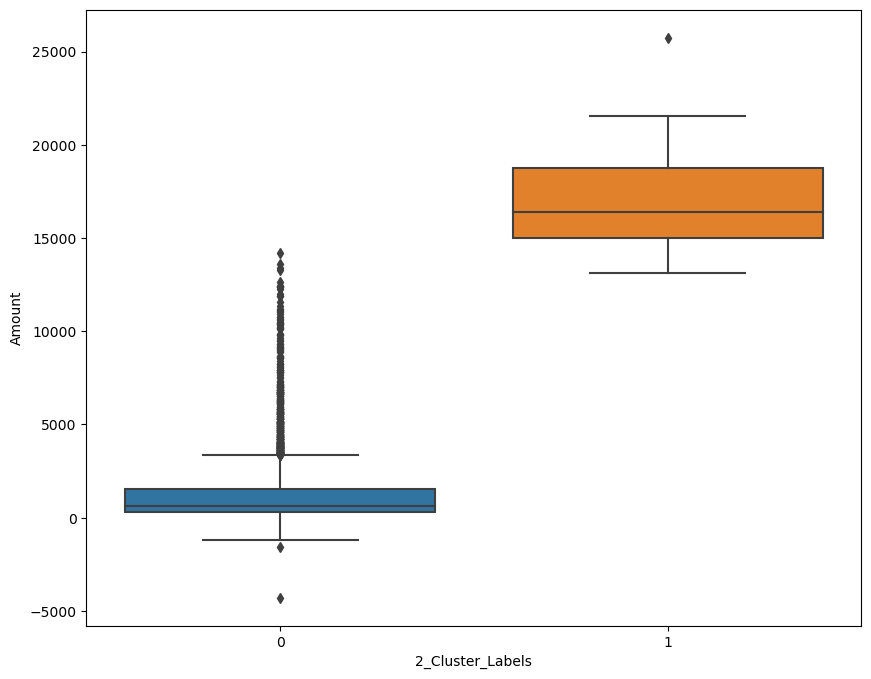

In [334]:
# Plot 2 Cluster Label vs Amount
sns.boxplot(x='2_Cluster_Labels', y='Amount', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 2 cluster labels obtained from hierarchical clustering and the 'Amount' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '2_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Amount' to represent the amount variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Labels', ylabel='Frequency'>

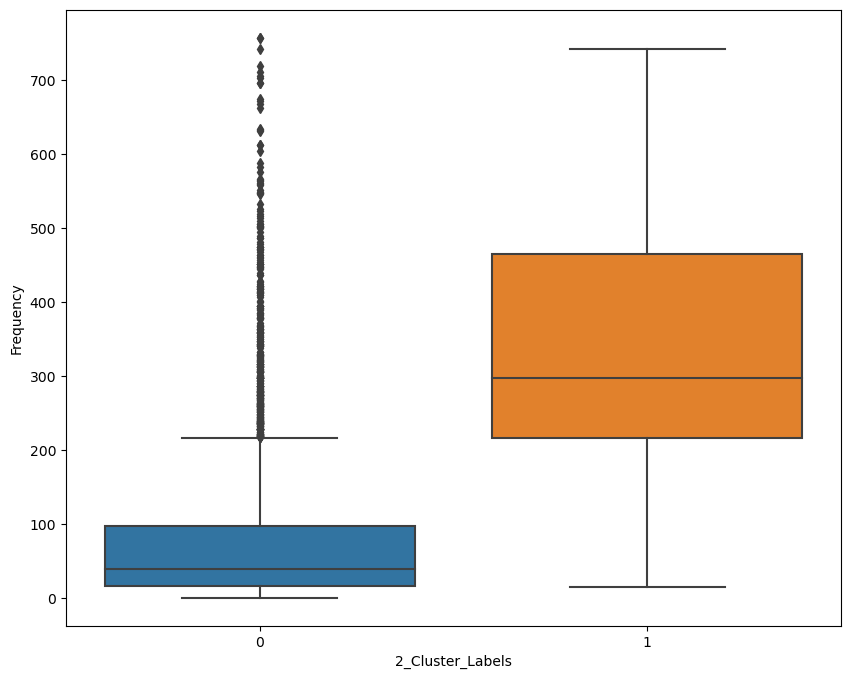

In [335]:
# Plot 2 Cluster Label vs Frequency
sns.boxplot(x='2_Cluster_Labels', y='Frequency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 2 cluster labels obtained from hierarchical clustering and the 'Frequency' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '2_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Frequency' to represent the frequency variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='2_Cluster_Labels', ylabel='Recency'>

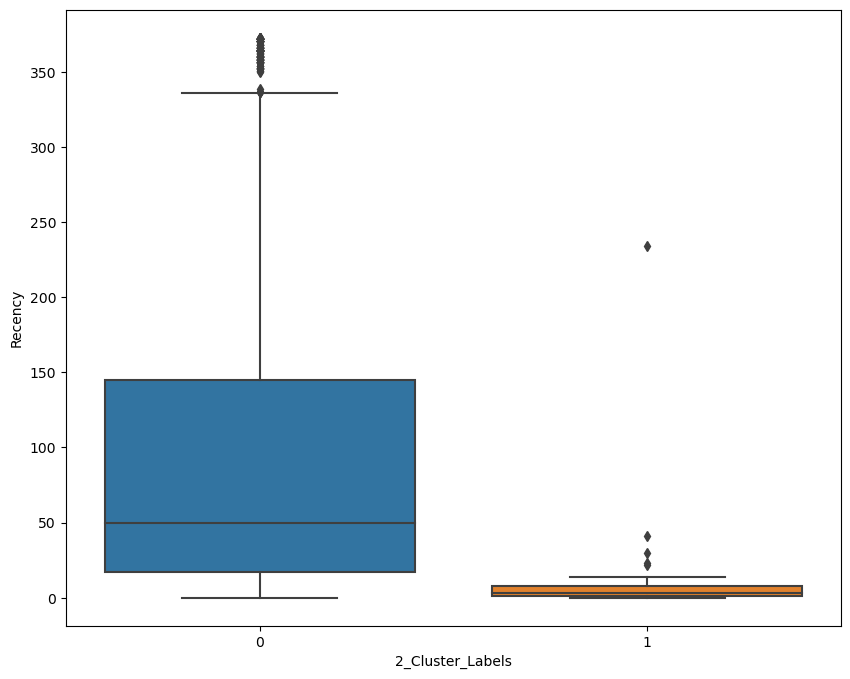

In [336]:
# Plot 2 Cluster Label vs Recency
sns.boxplot(x='2_Cluster_Labels', y='Recency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 2 cluster labels obtained from hierarchical clustering and the 'Recency' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '2_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Recency' to represent the recency variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Labels', ylabel='Amount'>

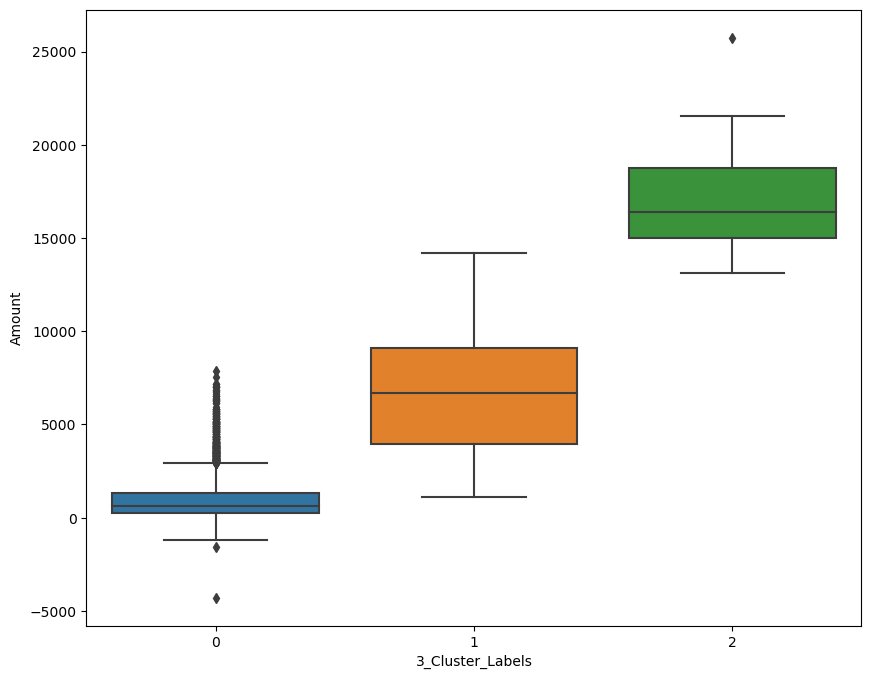

In [337]:
# Plot 3 Cluster Label vs Amount
sns.boxplot(x='3_Cluster_Labels', y='Amount', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 3 cluster labels obtained from hierarchical clustering and the 'Amount' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '3_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Amount' to represent the amount variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Labels', ylabel='Frequency'>

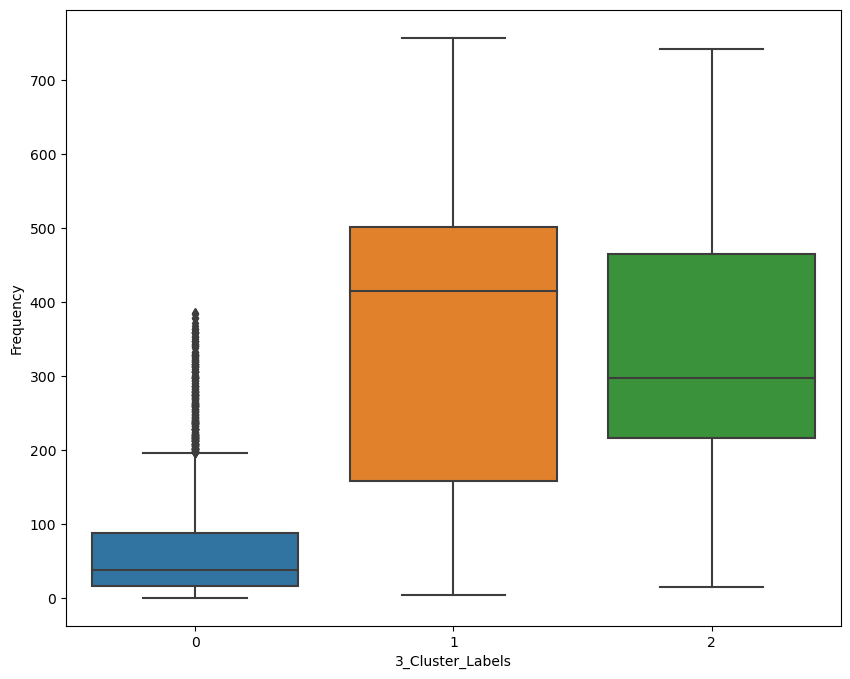

In [338]:
# Plot 3 Cluster Label vs Frequency
sns.boxplot(x='3_Cluster_Labels', y='Frequency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 3 cluster labels obtained from hierarchical clustering and the 'Frequency' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '3_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Frequency' to represent the frequency variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<AxesSubplot:xlabel='3_Cluster_Labels', ylabel='Recency'>

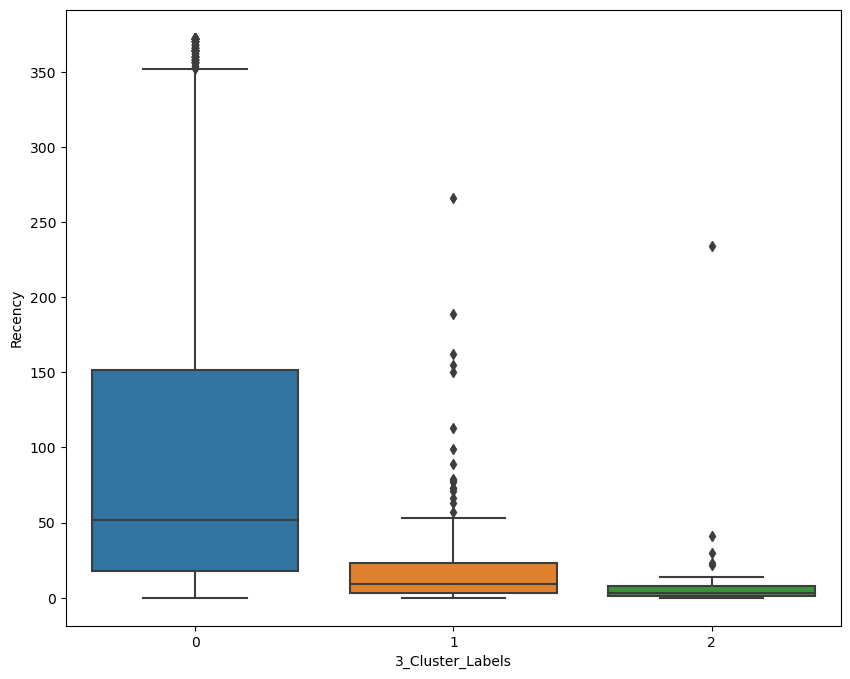

In [339]:
# Plot 3 Cluster Label vs Recency
sns.boxplot(x='3_Cluster_Labels', y='Recency', data=rfm)

<div>
<p>
This code creates a box plot to visualize the relationship between the 3 cluster labels obtained from hierarchical clustering and the 'Recency' variable in the 'rfm' DataFrame.
</p>
<p>
The 'sns.boxplot()' function from the Seaborn library is used to create the box plot. The 'x' parameter is set to '3_Cluster_Labels' to represent the cluster labels and the 'y' parameter is set to 'Recency' to represent the recency variable. The 'data' parameter is set to the 'rfm' DataFrame. 
</p>
</div>

<a id="5"></a> <br>
## Step 5 : Final Analysis

### Inference (2 Clusters):
K-Means Clustering with 2 Cluster Ids
- Customers with Cluster Id 1 are the customers with high transaction amounts(1X to 2X) as compared to customers with Cluster Id 0.
- Customers with Cluster Id 1 are frequent buyers, and have a frequency close to 2X to 3X as compared to customers with Cluster Id 0.
- Customers with Cluster Id 0 are not recent buyers and hence of less importance from business point of view.

Hierarchical Clustering with 2 Cluster Labels
- Customers with Cluster_Labels 1 are the customers with significantly high transaction amounts(3X to 4X) as compared to customers with Cluster Id 0.
- Customers with Cluster_Labels 1 are frequent buyers, and have a frequency close to 2X to 3X as compared to customers with Cluster Id 0.
- Customers with Cluster_Labels 0 are not recent buyers and hence of less importance from business point of view.

### Inference (3 Clusters):
K-Means Clustering with 3 Cluster Ids
- Customers with Cluster Id 1 are the customers with highest transaction amounts, followed by Cluster Id 2, and Cluster Id 0 respectively. As compared to other customers, the transaction amounts for Cluster Id 1 is almost 2X.
- Customers with Cluster Id 1 are frequent buyers, followed by Cluster Id 2, and Cluster Id 0 respectively. The frequency for Cluster Id 2 is almost 2X and for Cluster Id 1 is 3X to 4X, when compared to Cluster Id 0.
- Customers with Cluster Id 0 are the least recent buyers, followed by  Cluster Id 2 , and Cluster Id 1 which are the set of most recent customers. Hence customers with Cluster Id 1 are of greater importance to the business as compared to Cluster Id 2 and further Cluster Id 0, in the decresing order of importance.

Hierarchical Clustering with 3 Cluster Labels
- Customers with Cluster_Labels 2 are the customers with highest amount of transactions,  followed by Cluster label 1, and Cluster Label 0 respectively. As compared to other Cluster Label 0, the transaction amounts for Cluster Label 2 is almost 4X. As compared to other Cluster Label 1, the transaction amounts for Cluster Label 2 is almost 2X.
- Customers with Cluster_Labels 1 and 2 are the most frequent buyers.The frequency for Cluster Label 2 and 1 is almost similar and is almost 2X of Cluster Id 0.
- Customers with Cluster Label 0 are the least recent buyers, followed by  Cluster Label 1 , and Cluster Label 2 which are the set of most recent customers. Hence customers with Cluster Label 2 are of greater importance to the business as compared to Cluster Label 1 and further Cluster Label 0, in the decresing order of importance.

### Inference

It makes more sense to create 3 clusters, as it helps in segregating customers better than 2 clusters. It further provides better and in-depth insights into the purchase behaviour of customers, and will better help target and retarget similar customers for the business.